## **BUSSINES UNDERSTANDING**

### **Latar Belakang**

Damara Store adalah toko retail online yang menyediakan berbagai produk konsumen untuk memenuhi kebutuhan pelanggan. Dalam era digital yang kompetitif, menjaga loyalitas pelanggan menjadi tantangan utama bagi bisnis retail. Retensi pelanggan yang kuat tidak hanya mengurangi biaya akuisisi pelanggan baru tetapi juga membantu meningkatkan pendapatan melalui pembelian ulang. Oleh karena itu, memahami perilaku dan preferensi pelanggan menjadi kunci untuk menciptakan strategi pemasaran yang lebih relevan dan personal.

### **Pertanyaan Bisnis**

**Bagaimana Damara Store dapat meningkatkan retensi pelanggan?**  
   Strategi atau tindakan apa yang dapat dilakukan untuk mendorong pelanggan baru agar kembali melakukan pembelian?

### **Tujuan**
**Meningkatkan Retensi Pelanggan**:  
   Mengidentifikasi dan menerapkan strategi yang dapat meningkatkan persentase pelanggan yang kembali melakukan transaksi dalam periode tertentu (mingguan, bulanan, atau tahunan), serta mengevaluasi keberhasilan inisiatif loyalitas.

## **DATA UNDERSTANDING**

### **Deskripsi Variabel Dataset**

Dari dataset yang dimiliki terdapat beberapa data yang tersedia:
1. `order_id`: ID unik untuk setiap pesanan.
2. `product_code`: Kode unik untuk setiap produk yang dipesan.
3. `product_name`: Nama produk yang dipesan.
4. `quantity`: Jumlah produk dalam pesanan. Nilai negatif mungkin menunjukkan pengembalian produk.
5. `order_date`: Tanggal dan waktu saat pesanan dilakukan.
6. `price`: Harga per unit dari produk yang dipesan.
7. `customer_id`: ID unik pelanggan yang melakukan pesanan.

### **Data Overview**

In [3]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import datetime as dt

# Import library viusalisasi
import matplotlib.pyplot as plt

In [4]:
# Load dataset yang akan digunakan
df = pd.read_csv('../data/Online_Retail_Data.csv')
df.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN


In [5]:
# melihat bentuk dataset
df.shape

(461773, 7)

In [6]:
# melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461773 entries, 0 to 461772
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      461773 non-null  object 
 1   product_code  461773 non-null  object 
 2   product_name  459055 non-null  object 
 3   quantity      461773 non-null  int64  
 4   order_date    461773 non-null  object 
 5   price         461773 non-null  float64
 6   customer_id   360853 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 24.7+ MB


In [7]:
# melihat deskripsi statistik dataset
df.describe()

,quantity,price,customer_id
count,461773.000000,461773.000000,360853.000000
mean,9.088892,4.569963,15557.611138
std,86.366467,153.411566,1593.728741
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,14210.000000
50%,3.000000,2.100000,15580.000000
75%,10.000000,4.210000,16938.000000
max,10200.000000,25111.090000,18287.000000


In [8]:
# Melihat jumlah nilai null pada dataset
df.isnull().sum()

order_id             0
product_code         0
product_name      2718
quantity             0
order_date           0
price                0
customer_id     100920
dtype: int64

In [9]:
# melihat jumlah nilai duplikat
df.duplicated().sum()

6479

## **DATA CLEANSING**

Data cleansing dilakukan untuk memastikan data dalam kondisi bersih, konsisten, dan bebas dari kesalahan. Proses ini mencakup berbagai langkah untuk meningkatkan kualitas data, sehingga analisis dapat dilakukan secara akurat dan menghasilkan wawasan yang dapat diandalkan.

In [10]:
# membuat salinan dataset
df_clean = df.copy()

#### **Konversi Tanggal dan Penambahan Kolom Baru**
 Mengubah format kolom **order_date** menjadi tipe data datetime agar bisa diproses lebih lanjut. Kemudian menambahkan kolom baru **year_month** yang berisi periode bulan dan tahun dari tanggal pemesanan.

In [11]:
# Mengkonversi kolom order_date menjadi datetime
df_clean['order_date'] = df_clean['order_date'].astype('datetime64[ns]')
# membuat kolom date
df_clean['date'] = pd.to_datetime(df_clean['order_date']).dt.date.astype('datetime64[ns]')
# membuat kolom year_month
df_clean['year_month'] = df_clean['order_date'].dt.to_period('M')

df_clean.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id,date,year_month
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0,2010-01-04,2010-01
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0,2010-01-04,2010-01
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0,2010-01-04,2010-01
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN,2010-01-04,2010-01
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN,2010-01-04,2010-01


#### **Pembersihan Data yang Hilang**

Menghapus baris-baris yang tidak memiliki nilai pada kolom **customer_id** dan product_name karena data tersebut tidak valid untuk analisis lebih lanjut.

In [12]:
# menghapus baris yang memiliki nilai null
df_clean = df_clean.dropna()

# mengecek apakah masih ada nilai null atau tidak
df_clean.isnull().sum()

order_id        0
product_code    0
product_name    0
quantity        0
order_date      0
price           0
customer_id     0
date            0
year_month      0
dtype: int64

#### **Menghapus Data Test**

Mengubah semua nilai pada kolom **product_name** menjadi huruf kecil untuk konsistensi data Kemudian menghapus semua baris yang mengandung informasi mengenai produk pengujian dengan kata "test" pada kolom **product_code** dan **product_name**.

In [13]:
# membuat semua product_name berhuruf kecil
df_clean['product_name'] = df_clean['product_name'].str.lower()
# menghapus semua baris dengan product_code atau product_name test
df_clean = df_clean[(~df_clean['product_code'].str.lower().str.contains('test')) |
                    (~df_clean['product_name'].str.contains('test'))]

df_clean.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id,date,year_month
1,C493411,21539,retro spots butter dish,-1,2010-01-04 09:43:00,4.25,14590.0,2010-01-04,2010-01
6,493414,21844,retro spot mug,36,2010-01-04 10:28:00,2.55,14590.0,2010-01-04,2010-01
7,493414,21533,retro spot large milk jug,12,2010-01-04 10:28:00,4.25,14590.0,2010-01-04,2010-01
8,493414,37508,new england ceramic cake server,2,2010-01-04 10:28:00,2.55,14590.0,2010-01-04,2010-01
9,493414,35001G,hand open shape gold,2,2010-01-04 10:28:00,4.25,14590.0,2010-01-04,2010-01


#### **Menambahkan Status Order**
Membuat kolom **order_status** yang mengidentifikasi apakah pesanan dibatalkan atau dikirim berdasarkan awalan pada order_id. Jika order_id dimulai dengan 'C', statusnya adalah 'cancelled', jika tidak maka 'delivered'.

In [14]:
# membuat kolom order_status dengan nilai 'cancelled' jika order_id diawali dengan huruf 'c' dan 'delivered' jika order_id tanpa awalan huruf 'c'
df_clean['order_status'] = np.where(df_clean['order_id'].str[:1]=='C', 'cancelled', 'delivered')

#### **Pembersihan Data Quantity dan Data Harga**

Mengubah nilai negatif pada kolom **quantity** menjadi positif, karena nilai negatif biasanya menunjukkan pesanan yang dibatalkan, namun yang diinginkan adalah jumlah produk yang sebenarnya dipesan. Kemudian
menghapus baris dengan nilai harga (price) yang negatif karena harga tidak boleh bernilai negatif dalam konteks transaksi.

In [15]:
# mengubah nilai quantity yang negatif menjadi positif
df_clean['quantity'] = df_clean['quantity'].abs()
# menghapus baris dengan price bernilai negatif
df_clean = df_clean[df_clean['price']>0]

#### **Membuat kolom Amount**
Membuat kolom baru **amount** yang dihitung dari perkalian antara **quantity** dan **price** untuk memperoleh total nilai transaksi per produk.

In [16]:
# membuat nilai amount, yaitu perkalian antara quantity dan price
df_clean['amount'] = df_clean['quantity'] * df_clean['price']

#### **Mengganti Nama Produk yang Tidak Konsisten**
Mengganti nama produk untuk setiap **product_code** yang memiliki beberapa nama produk dengan nama yang paling sering muncul, untuk menjaga konsistensi data.

In [17]:
# mengganti product_name dari product_code yang memiliki beberapa product_name
most_freq_product_name = df_clean.groupby(['product_code','product_name'], as_index=False).agg(order_cnt=('order_id','nunique')).sort_values(['product_code','order_cnt'], ascending=[True,False])
most_freq_product_name['rank'] = most_freq_product_name.groupby('product_code')['order_cnt'].rank(method='first', ascending=False)
most_freq_product_name = most_freq_product_name[most_freq_product_name['rank']==1].drop(columns=['order_cnt','rank'])
df_clean = df_clean.merge(most_freq_product_name.rename(columns={'product_name':'most_freq_product_name'}), how='left', on='product_code')
df_clean['product_name'] = df_clean['most_freq_product_name']
df_clean = df_clean.drop(columns='most_freq_product_name')

#### **Mengkonversi Customer ID**
Mengubah kolom **customer_id** menjadi tipe data string untuk memastikan konsistensi data pada seluruh dataset. dan juga menghapus nilai dibelakang koma.

In [18]:
# Mengkonversi customer_id menjadi string
df_clean['customer_id'] = df_clean['customer_id'].astype(str)

# Menghapus nilai di belakang koma (jika ada)
df_clean['customer_id'] = df_clean['customer_id'].str.split('.').str[0]

#### **Menghapus Nilai Outlier**

Menghapus baris yang mengandung nilai outlier pada kolom **quantity** dan **amount** menggunakan metode Z-Score. Outlier yang melebihi batas Z-Score 3 dianggap sebagai data yang tidak wajar.

In [19]:
# menghapus outlier
from scipy import stats
df_clean = df_clean[(np.abs(stats.zscore(df_clean[['quantity','amount']]))<3).all(axis=1)]

# reset index
df_clean = df_clean.reset_index(drop=True)
df_clean

,order_id,product_code,product_name,quantity,order_date,price,customer_id,date,year_month,order_status,amount
0,C493411,21539,red retrospot butter dish,1,2010-01-04 09:43:00,4.25,14590,2010-01-04,2010-01,cancelled,4.25
1,493414,21844,red retrospot mug,36,2010-01-04 10:28:00,2.55,14590,2010-01-04,2010-01,delivered,91.80
2,493414,21533,retro spot large milk jug,12,2010-01-04 10:28:00,4.25,14590,2010-01-04,2010-01,delivered,51.00
3,493414,37508,new england ceramic cake server,2,2010-01-04 10:28:00,2.55,14590,2010-01-04,2010-01,delivered,5.10
4,493414,35001G,hand open shape gold,2,2010-01-04 10:28:00,4.25,14590,2010-01-04,2010-01,delivered,8.50
...,...,...,...,...,...,...,...,...,...,...,...
358464,539988,84380,set of 3 butterfly cookie cutters,1,2010-12-23 16:06:00,1.25,18116,2010-12-23,2010-12,delivered,1.25
358465,539988,84849D,hot baths soap holder,1,2010-12-23 16:06:00,1.69,18116,2010-12-23,2010-12,delivered,1.69
358466,539988,84849B,fairy soap soap holder,1,2010-12-23 16:06:00,1.69,18116,2010-12-23,2010-12,delivered,1.69
358467,539988,22854,cream sweetheart egg holder,2,2010-12-23 16:06:00,4.95,18116,2010-12-23,2010-12,delivered,9.90


In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358469 entries, 0 to 358468
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      358469 non-null  object        
 1   product_code  358469 non-null  object        
 2   product_name  358469 non-null  object        
 3   quantity      358469 non-null  int64         
 4   order_date    358469 non-null  datetime64[ns]
 5   price         358469 non-null  float64       
 6   customer_id   358469 non-null  object        
 7   date          358469 non-null  datetime64[ns]
 8   year_month    358469 non-null  period[M]     
 9   order_status  358469 non-null  object        
 10  amount        358469 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5), period[M](1)
memory usage: 30.1+ MB


### **Clean Data**

In [21]:
df_clean.to_csv('../data/Online_Retail_Data_Clean.csv', index=False)

## **CUSTOMER RETENTION RATE (Cohort Analysis)**

User Retention Rate adalah metrik yang digunakan untuk mengukur persentase pelanggan yang kembali melakukan pembelian pada periode berikutnya, seperti bulan atau tahun, guna mengevaluasi tingkat loyalitas pelanggan dan efektivitas strategi retensi.

### **Agregat data transaksi ke bentuk summary total transaksi/order setiap pengguna setiap bulan**

Menghitung total pesanan yang dilakukan oleh setiap pelanggan setiap bulan, untuk melihat seberapa sering mereka melakukan transaksi di setiap bulan.

In [22]:
# Mengelompokkan data berdasarkan `customer_id` dan `year_month`,
# lalu menghitung jumlah pesanan unik (`order_id`) untuk setiap kombinasi tersebut.
df_user_monthly = df_clean.groupby(['customer_id','year_month'], as_index=False).agg(order_cnt=('order_id','nunique'))

df_user_monthly.head()

,customer_id,year_month,order_cnt
0,12346,2010-01,1
1,12346,2010-03,1
2,12346,2010-06,2
3,12346,2010-10,1
4,12608,2010-10,1


### **Membuat kolom sebagai cohort dari pengguna**

Menambahkan kolom `cohort` yang berisi bulan pertama (min) setiap pelanggan (`customer_id`) berdasarkan `year_month`. Untuk mengetahui bulan pertama saat melakukan transaksi pada masing-masing customer

In [23]:
df_user_monthly['cohort'] = df_user_monthly.groupby('customer_id')['year_month'].transform('min')

df_user_monthly.head()

,customer_id,year_month,order_cnt,cohort
0,12346,2010-01,1,2010-01
1,12346,2010-03,1,2010-01
2,12346,2010-06,2,2010-01
3,12346,2010-10,1,2010-01
4,12608,2010-10,1,2010-10


### **Menghitung Jarak Bulan Transaksi dari Bulan Pertama dan Menambahkan 1 untuk Menandakan Bulan Pertama**

Menghitung selisih bulan antara bulan transaksi dengan bulan pertama kali transaksi untuk setiap pelanggan, kemudian menambahkan 1 pada hasil perhitungan agar bulan pertama transaksi dihitung sebagai bulan 1, bulan kedua sebagai bulan 2, dan seterusnya. Ini bertujuan untuk memberikan urutan bulan yang lebih jelas berdasarkan periode transaksi pertama setiap pelanggan.

In [24]:
from operator import attrgetter # Mengimpor fungsi untuk mengambil atribut objek.

# Menghitung selisih bulan antara transaksi dan bulan pertama pembelian
# (cohort), lalu ditambah 1 agar periode dimulai dari 1.
df_user_monthly['period_num'] = (df_user_monthly['year_month'] - df_user_monthly['cohort']).apply(attrgetter('n')) + 1

# Menampilkan DataFrame dengan kolom 'period_num' yang baru ditambahkan.
df_user_monthly.head()

,customer_id,year_month,order_cnt,cohort,period_num
0,12346,2010-01,1,2010-01,1
1,12346,2010-03,1,2010-01,3
2,12346,2010-06,2,2010-01,6
3,12346,2010-10,1,2010-01,10
4,12608,2010-10,1,2010-10,1


### **Membuat Tabel Pivot untuk Pengguna Unik Berdasarkan Cohort dan Jarak Bulan**

Tabel pivot ini menggunakan **cohort** sebagai indeks, **jarak bulan** sebagai kolom, dan nilai yang dihitung adalah jumlah **pengguna unik** (berdasarkan ID pengguna) untuk setiap kombinasi cohort dan jarak bulan.

In [25]:
# membuat tabel pivot
df_cohort_pivot = pd.pivot_table(df_user_monthly, index='cohort', columns='period_num', values='customer_id', aggfunc=pd.Series.nunique)
df_cohort_pivot

period_num,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,
2010-01,713.0,280.0,334.0,313.0,305.0,304.0,293.0,268.0,285.0,319.0,335.0,249.0
2010-02,461.0,154.0,128.0,161.0,152.0,121.0,119.0,159.0,153.0,166.0,100.0,NaN
2010-03,528.0,146.0,158.0,145.0,140.0,123.0,149.0,186.0,193.0,96.0,NaN,NaN
2010-04,326.0,82.0,75.0,63.0,69.0,79.0,98.0,101.0,50.0,NaN,NaN,NaN
2010-05,274.0,55.0,50.0,52.0,52.0,72.0,67.0,43.0,NaN,NaN,NaN,NaN
2010-06,266.0,53.0,56.0,60.0,65.0,85.0,39.0,NaN,NaN,NaN,NaN,NaN
2010-07,179.0,38.0,37.0,52.0,53.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,160.0,35.0,50.0,48.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,227.0,64.0,60.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Menghitung Retention Rate Berdasarkan Cohort Pengguna**

Menghitung jumlah pengguna yang pertama kali bertransaksi di setiap bulan (cohort), lalu membagi nilai pada tabel pivot dengan jumlah pengguna di masing-masing cohort untuk mendapatkan retention rate, yang menunjukkan persentase pengguna yang kembali bertransaksi di bulan-bulan berikutnya.

In [26]:
# Jumlah pengguna unik di setiap cohort (periode pertama).
cohort_size = df_cohort_pivot.iloc[:, 0]

cohort_size

cohort
2010-01    713.0
2010-02    461.0
2010-03    528.0
2010-04    326.0
2010-05    274.0
2010-06    266.0
2010-07    179.0
2010-08    160.0
2010-09    227.0
2010-10    362.0
2010-11    327.0
2010-12     66.0
Freq: M, Name: 1, dtype: float64

In [27]:
# Menghitung retention rate per cohort.
df_retention_cohort = df_cohort_pivot.divide(cohort_size, axis=0)
df_retention_cohort

period_num,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,
2010-01,1.0,0.392707,0.468443,0.438990,0.427770,0.426367,0.410940,0.375877,0.399719,0.447405,0.469846,0.349229
2010-02,1.0,0.334056,0.277657,0.349241,0.329718,0.262473,0.258134,0.344902,0.331887,0.360087,0.216920,NaN
2010-03,1.0,0.276515,0.299242,0.274621,0.265152,0.232955,0.282197,0.352273,0.365530,0.181818,NaN,NaN
2010-04,1.0,0.251534,0.230061,0.193252,0.211656,0.242331,0.300613,0.309816,0.153374,NaN,NaN,NaN
2010-05,1.0,0.200730,0.182482,0.189781,0.189781,0.262774,0.244526,0.156934,NaN,NaN,NaN,NaN
2010-06,1.0,0.199248,0.210526,0.225564,0.244361,0.319549,0.146617,NaN,NaN,NaN,NaN,NaN
2010-07,1.0,0.212291,0.206704,0.290503,0.296089,0.167598,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,1.0,0.218750,0.312500,0.300000,0.168750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,1.0,0.281938,0.264317,0.136564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Menampilkan Heatmap Retention Rate**

Heatmap digunakan untuk memvisualisasikan retention rate dari tabel pivot, dengan warna yang menggambarkan tingkat retensi pengguna pada setiap kombinasi cohort dan jarak bulan.

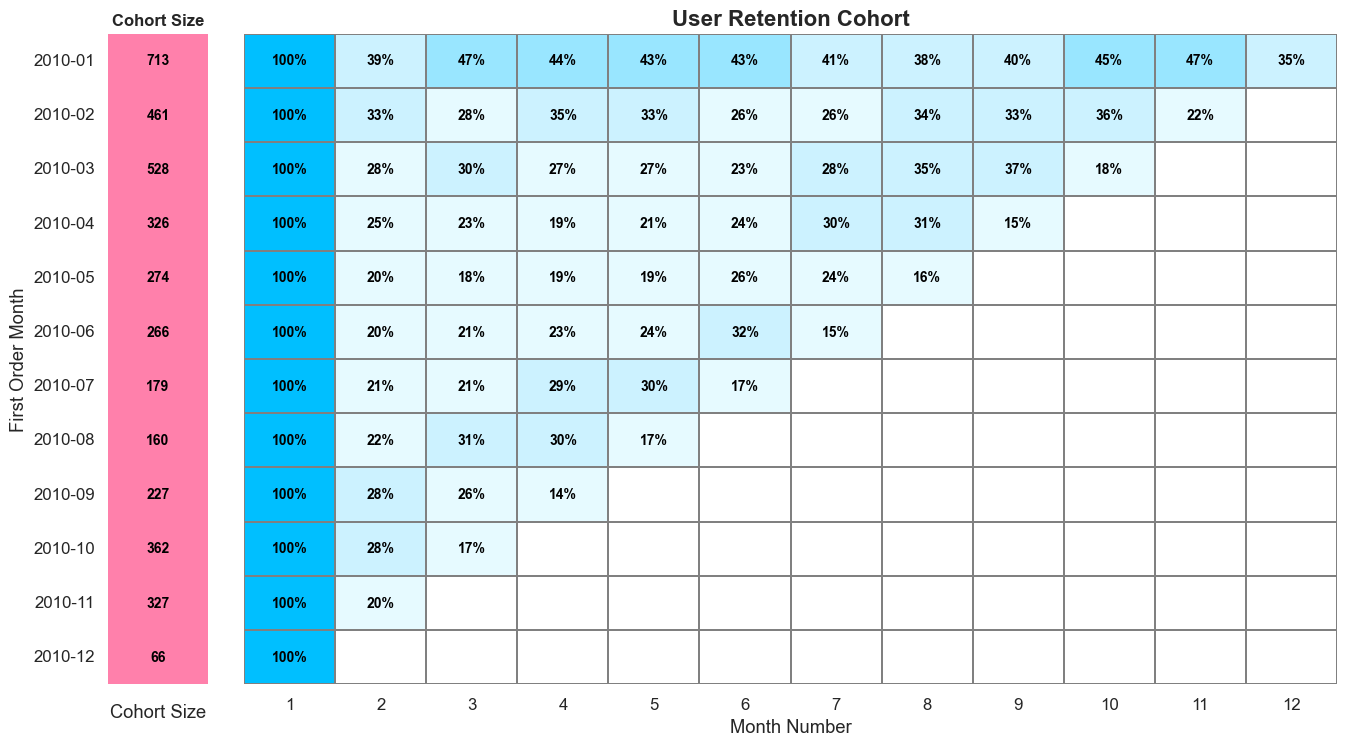

In [28]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

# Warna hijau muda untuk colormap
# Warna biru muda untuk colormap
light_blue_cmap = mcolors.ListedColormap(['#e6faff', '#ccf2ff', '#99e6ff', '#66d9ff', '#33ccff', '#00bfff'])

# Set custom styles for aesthetics
sns.set(style="white", font_scale=1.1)

with sns.axes_style('white'):
    fig, ax = plt.subplots(1, 2, figsize=(14, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # User retention cohort with green colormap
    sns.heatmap(
        df_retention_cohort, annot=True, fmt='.0%', cmap=light_blue_cmap,
        ax=ax[1], cbar=False, linewidths=0.1, linecolor='grey',
        annot_kws={"size": 10, "weight": "bold", "color": "black"}
    )
    ax[1].set_title('User Retention Cohort', fontsize=16, fontweight='bold')
    ax[1].set(xlabel='Month Number', ylabel='')

    # Cohort size with a lighter blue background
    df_cohort_size = pd.DataFrame(cohort_size)
    light_blue_cmap = mcolors.ListedColormap(['#ff80ab'])  # Light blue color
    sns.heatmap(
        df_cohort_size, annot=True, cbar=False, fmt='g', cmap=light_blue_cmap, ax=ax[0],
        annot_kws={"size": 10, "weight": "bold", "color": "black"}
    )
    ax[0].tick_params(bottom=False)
    ax[0].set(xlabel='Cohort Size', ylabel='First Order Month', xticklabels=[])
    ax[0].set_title('Cohort Size', fontsize=12, fontweight='bold')

    # Adjust layout for better spacing
    fig.tight_layout(pad=2.0)

plt.show()

**Insight:**

Berdasarkan hasil **User Retention Cohort**, terlihat bahwa tingkat retensi pelanggan cenderung menurun seiring waktu. Pelanggan yang bergabung pada bulan pertama (cohort) menunjukkan persentase retensi 100%, namun angka ini terus berkurang di bulan-bulan berikutnya. Misalnya, cohort Januari 2010 mengalami penurunan retensi dari 39% di bulan kedua menjadi 35% di bulan ke-12. Pola ini menunjukkan bahwa semakin lama pelanggan bergabung, semakin kecil kemungkinan mereka kembali melakukan pembelian. Selain itu, terdapat variasi antar cohort. Cohort Januari 2010 menunjukkan retensi yang lebih stabil dibanding cohort lain, dengan persentase yang tetap tinggi hingga bulan ke-12, sementara cohort seperti Mei dan Juni 2010 memiliki penurunan retensi yang lebih tajam, dengan retensi hanya 16% di bulan ke-6. Variasi ini kemungkinan dipengaruhi oleh faktor eksternal seperti strategi pemasaran, musim, atau pengalaman pelanggan.

### **Persiapan Data Untuk Visualisasi Dashboard**

In [29]:
# Hitung jumlah pelanggan aktif per cohort dan period_num
active_customers = (
    df_user_monthly.groupby(["cohort", "period_num"])["customer_id"]
    .nunique()
    .reset_index()
)
active_customers.rename(columns={"customer_id": "active_customers"}, inplace=True)

# Hitung jumlah pelanggan awal setiap cohort
cohort_sizes = (
    df_user_monthly[df_user_monthly["period_num"] == 1]
    .groupby("cohort")["customer_id"]
    .nunique()
    .reset_index()
)
cohort_sizes.rename(columns={"customer_id": "cohort_size"}, inplace=True)

# Gabungkan data active_customers dengan cohort_sizes
retention_data = active_customers.merge(cohort_sizes, on="cohort")

# Tambahkan Churn Rate
retention_data["churn_rate"] = 100 - (retention_data["active_customers"] / retention_data["cohort_size"] * 100)

# Tambahkan Retention Rate
retention_data["retention_rate"] = (retention_data["active_customers"] / retention_data["cohort_size"] * 100)

# Tampilkan hasil
retention_data

,cohort,period_num,active_customers,cohort_size,churn_rate,retention_rate
0,2010-01,1,713,713,0.000000,100.000000
1,2010-01,2,280,713,60.729313,39.270687
2,2010-01,3,334,713,53.155680,46.844320
3,2010-01,4,313,713,56.100982,43.899018
4,2010-01,5,305,713,57.223001,42.776999
...,...,...,...,...,...,...
73,2010-10,2,103,362,71.546961,28.453039
74,2010-10,3,61,362,83.149171,16.850829
75,2010-11,1,327,327,0.000000,100.000000
76,2010-11,2,66,327,79.816514,20.183486


In [30]:
# Save data
retention_data.to_csv('../data/retention_rate.csv', index=False)

## **Kesimpulan**


Berdasarkan hasil User Retention Cohort dapat disimpulkan bahwa analisis ini memberikan wawasan penting untuk strategi pemasaran yang lebih efektif.

**User Retention Cohort** menunjukkan penurunan retensi
pelanggan seiring waktu, dengan variasi antar cohort. Ini menunjukkan perlunya upaya untuk meningkatkan pengalaman pelanggan dan memberikan insentif yang menarik, terutama untuk cohort yang menunjukkan penurunan tajam.